In [1]:
from d3m_interface import Automl
import PipelineProfiler
import datetime

In [2]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
import numpy as np
%matplotlib inline

def live_plot(scores, start_time, best_prim):
    clear_output(wait=True)
    BIGGER_SIZE = 25

    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title
    
    width = 1.0 / len(scores) # the width of the bars
    
    fig, ax = plt.subplots(figsize=(10,10))
    position = 0
    
    for i in range(len(scores)):
        color = (float(65/255), float(179/255), float(247/255), 1)
        if i % 2 == 0:
            color = (float(129/255), float(203/255), float(248/255), 1)
        rects = ax.bar(position, scores[i], width, color=color, edgecolor='white') 
        # Add scores above the highest bar
        if i == (len(scores) - 1):
            rect = rects[len(rects) - 1]
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height, round(scores[i], 3), ha='center', va='bottom')
        position += width
           
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('f1 Performance ->')
    ax.set_xlabel('Top Pipelines')
    ax.set_title('JIDO Search - Pipeline score evolution')
    ax.set_xticklabels([])

    # Add a floating elapsed time
    elapsed = datetime.datetime.utcnow() - start_time
    time_display = str(elapsed).split('.', 2)[0]
    ax.text(0 - (width / 2), 0.9, "Time Elapsed: %s\nLearner: %s" % (time_display, best_prim))
    
    plt.ylim([0,1.0])
    plt.show()  

### Generating pipelines

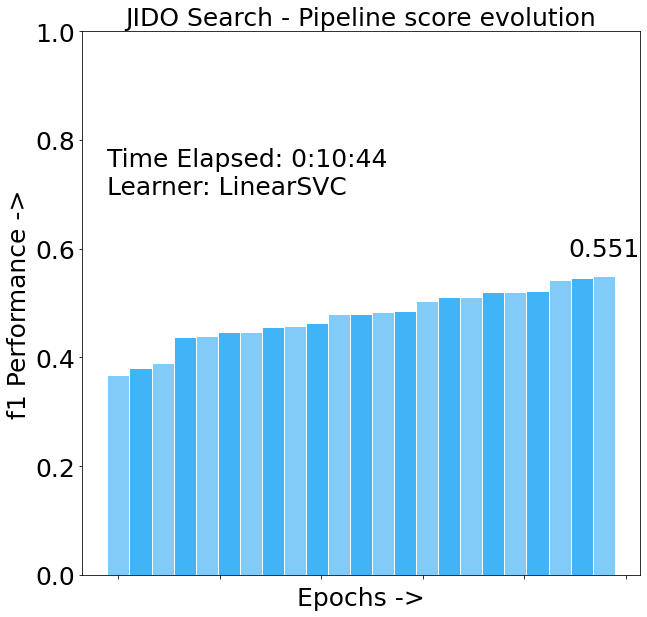

INFO: Ending session...
INFO: Session ended!


In [3]:
daragh_running = True

if daragh_running:
    output_path = '/Users/daraghhartnett/Projects/D3M/evals/20200518/animate_plots/d3m_interface/output/tmp/'
    dataset_path = '/Users/daraghhartnett/Projects/D3M/evals/20200518/animate_plots/d3m_interface/JIDO_SOHR_Articles_1061'
else:
    output_path = '/Users/freitag/project/d3m/stage/tmp'
    dataset_path = '/Users/freitag/project/d3m/stage/data/input/JIDO_SOHR_Articles_1061'

train_dataset = '%s/TRAIN' % dataset_path
test_dataset = '%s/TEST' % dataset_path
score_dataset = '%s/SCORE' % dataset_path

Automl.add_new_ta2('SRI', 'registry.gitlab.com/daraghhartnett/autoflow:latest') 
automl = Automl(output_path, 'SRI')

start_time = datetime.datetime.utcnow()
pipelines = automl.search_pipelines(train_dataset, time_bound=120)

def query_scores_and_draw_graph():
    data = automl.get_latest_dynamic_plot_data()
    best_prim = automl.get_current_best_primitive()
    if len(data) > 0:
        data = sorted(data)
        data = list(dict.fromkeys(data))
        live_plot(data, start_time, best_prim)

import time
import numpy as np
try:
    while True:
        time.sleep(1)
        query_scores_and_draw_graph()
except KeyboardInterrupt:
    # Call the graph method one last time, just in case the update was interrupted
    query_scores_and_draw_graph()
        
automl.end_session()